# Investigate Hotel Business using Data Visualization - Tugas 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set_style('darkgrid')
pal = sns.color_palette()

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Mengatasi Null Value

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

Data yang tidak memiliki value (null) terdiri dari:
- City
- Children
- Agent
- Company

Cara mengatasi value yang null tersebut akan dijelaskan dibawah ini:

In [5]:
df2 = df
# Mengisi null value yang ada dalam kolom 'city' menjadi 'Other'. Diasumsikan bahwa pelanggan tersebut berasal tidak dari Kabupaten atau Kota yang disediakan pada kolom 'city'
df2['city'] = df2['city'].fillna('Other')
# Mengisi null value yang ada dalam kolom 'agent' dan 'company' menjadi nilai 0
df2['agent'] = df2['agent'].fillna(0)
df2['company'] = df2['company'].fillna(0)
# Mengasumsikan bahwa null value yang terdapat pada 'children' merupakan pelanggan tanpa membawa anak
df2['children'] = df2['children'].fillna(0)
# Cek kembali untuk memeriksa apakah ada null values yang masih tersisa
df2.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [6]:
# Memperbaiki datatype yang tidak sesuai
df2['children'] = df2['children'].astype('int64')
df2['agent'] = df2['agent'].astype('int64')
df2['company'] = df2['company'].astype('int64')

## Mengatasi Value yang Tidak Sesuai

Rata-rata kolom yang memiliki value **'Undefined'** yang merupakan value yang tidak sesuai di dataset ini. Kolom yang memiliki value ini terdiri dari **'meal'**.

Cara mengatasi value yang tidak sesuai akan dijelaskan di bawah ini:

In [7]:
# Memperbaiki value yang tidak sesuai
# Value 'Undefined' pada kolom 'meal' diasumsikan sebagai pelanggan yang memiliki value 'No Meal'
df2['meal'] = df2['meal'].replace(['Undefined'], 'No Meal')
df2['meal'].value_counts()

meal
Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: count, dtype: int64

## Membuang Data yang Tidak Diperlukan

Data yang tidak diperlukan berupa data yang memiliki jumlah tamu dan durasi inap malam bernilai 0.

Cara membuang data yang tidak diperlukan akan dijelaskan di bawah ini:

In [8]:
# Menghapus data yang tidak diperlukan sesuai dengan jumlah 0 guest dan 0 night
df2['total_guests'] = df2['babies'] + df2['children'] + df2['adults']
print('Data dengan 0 tamu: {0} / {1}'.format(df2[df2['total_guests'] == 0].shape[0], df2.shape[0]))
df2['stay_duration'] = df2['stays_in_weekend_nights'] + df2['stays_in_weekdays_nights']
print('Data dengan 0 malam: {0} / {1}'.format(df2[df2['stay_duration'] == 0].shape[0], df2.shape[0]))

# Drop data yang memiliki nilai 0 pada 'total_guests' dan 'stay_duration'
df3 = df2[(df2['total_guests'] > 0) & (df2['stay_duration'] > 0)]

print('data sebelum dilakukan pre-processing:', df2.shape[0])
print('data setelah dilakukan pre-processing:', df3.shape[0])


Data dengan 0 tamu: 180 / 119390
Data dengan 0 malam: 715 / 119390
data sebelum dilakukan pre-processing: 119390
data setelah dilakukan pre-processing: 118565


## Monthly Hotel Booking Analysis Based on Hotel Type

In [9]:
# Melakukan copy data yang sudah bersih
df4 = df3.copy()
# Syntax groupby dipakai untuk melakukan agregasi berdasarkan tipe hotel per bulan.
df4_agg = df4.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
df4_agg.columns = ['hotel_type', 'arrival_month', 'unique_year', 'num_booking'] # change the columns' name
df4_agg

,hotel_type,arrival_month,unique_year,num_booking
0,City Hotel,April,2,4917
1,City Hotel,August,2,7874
2,City Hotel,December,2,7554
3,City Hotel,February,2,4097
4,City Hotel,January,2,4309
5,City Hotel,July,2,8184
6,City Hotel,June,2,7458
7,City Hotel,March,2,3712
8,City Hotel,May,2,6411
9,City Hotel,November,2,7377


Berdasarkan hasil diatas, terdapat data yang diambil dari 3 tahun yang lalu pada bulan September dan Oktober serta lainnya yang diambil 2 tahun yang lalu. Untuk mendapatkan perbandingan yang setara, maka semua jumlah booking akan dinormalisasikan.

In [10]:
df4_agg['avg_num_booking'] = round((df4_agg['num_booking'] / df4_agg['unique_year']), 2)
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df4_agg['month'] = df4_agg['arrival_month'].str[:3]
df4_agg['month'] = pd.Categorical(df4_agg['month'], categories=month, ordered=True)
df4_agg

,hotel_type,arrival_month,unique_year,num_booking,avg_num_booking,month
0,City Hotel,April,2,4917,2458.50,Apr
1,City Hotel,August,2,7874,3937.00,Aug
2,City Hotel,December,2,7554,3777.00,Dec
3,City Hotel,February,2,4097,2048.50,Feb
4,City Hotel,January,2,4309,2154.50,Jan
5,City Hotel,July,2,8184,4092.00,Jul
6,City Hotel,June,2,7458,3729.00,Jun
7,City Hotel,March,2,3712,1856.00,Mar
8,City Hotel,May,2,6411,3205.50,May
9,City Hotel,November,2,7377,3688.50,Nov


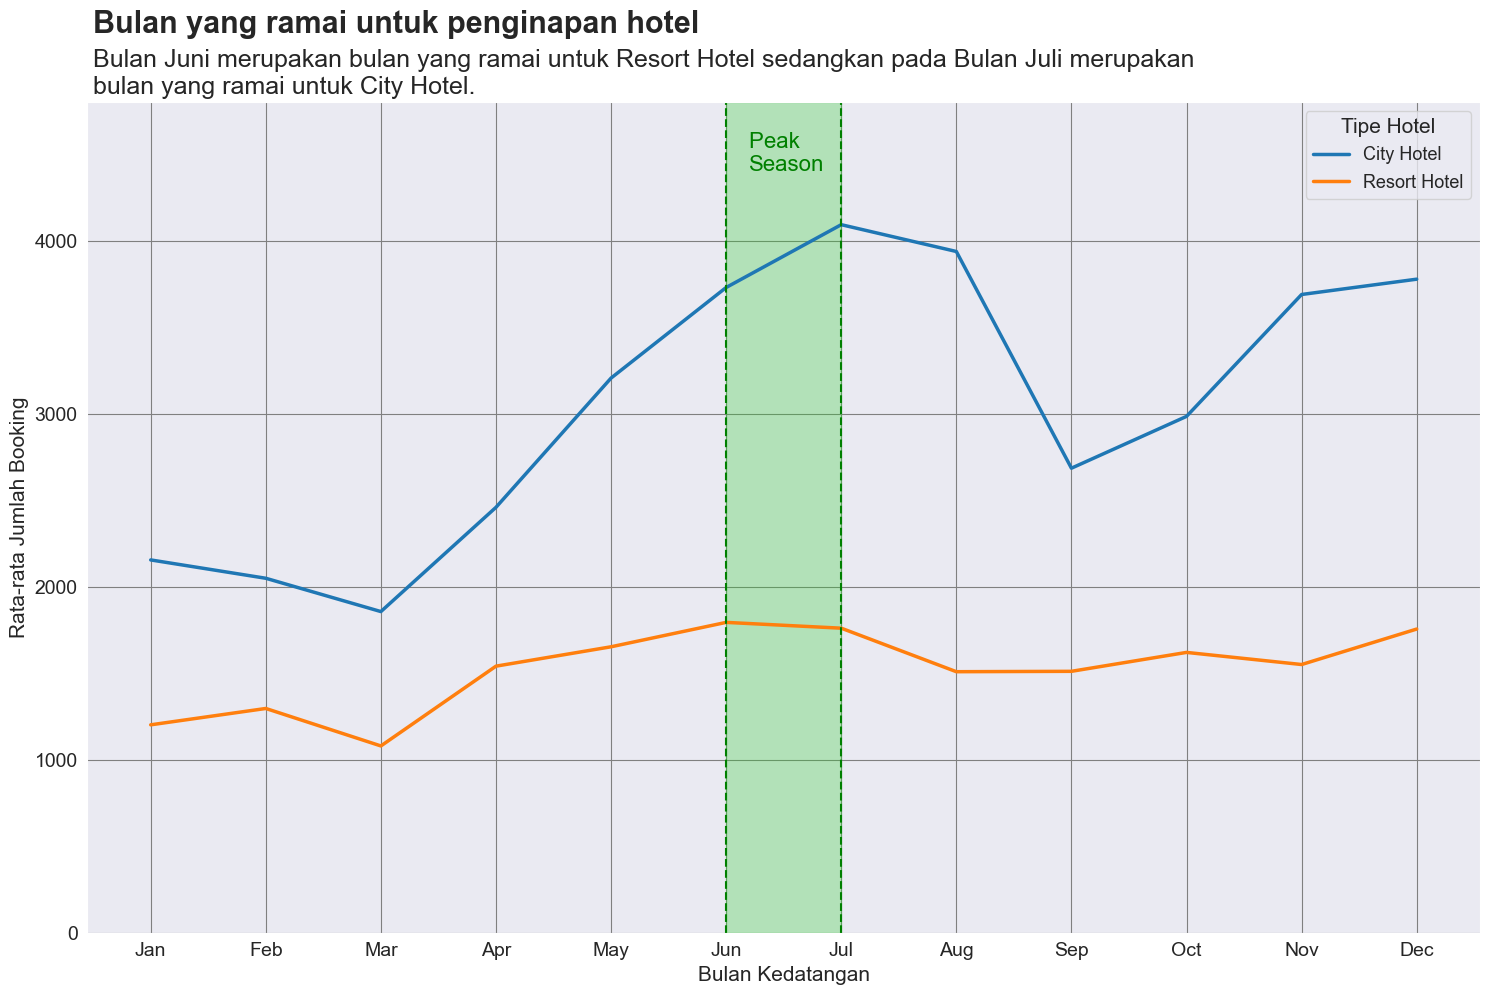

In [11]:
# Visualisasi data diatas
plt.figure(figsize=(15,10))
sns.lineplot(x='month', y='avg_num_booking', hue='hotel_type', size="hotel_type", sizes=(2.5, 2.5), data=df4_agg) 
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(color='gray') # add gray gridline
plt.legend(title='Tipe Hotel', title_fontsize=15, prop={'size':13})
plt.xlabel('Bulan Kedatangan', fontsize=15)
plt.ylabel('Rata-rata Jumlah Booking', fontsize=15)
plt.ylim(0, 4800)
plt.axvline(5, ls='--', color='green')
plt.axvline(6, ls='--', color='green')
plt.text(x=5.2, y=4400, s='Peak \nSeason', fontsize=16, color='green')
plt.stackplot(np.arange(5,7,1), [[4800]], color='limegreen', alpha=0.3)
plt.text(x=-0.5, y=5200, s='Bulan yang ramai untuk penginapan hotel', fontsize=22, fontweight='bold')
plt.text(x=-0.5, y=4850, s='Bulan Juni merupakan bulan yang ramai untuk Resort Hotel sedangkan pada Bulan Juli merupakan\nbulan yang ramai untuk City Hotel.', fontsize=18)
plt.tight_layout()

## Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rate

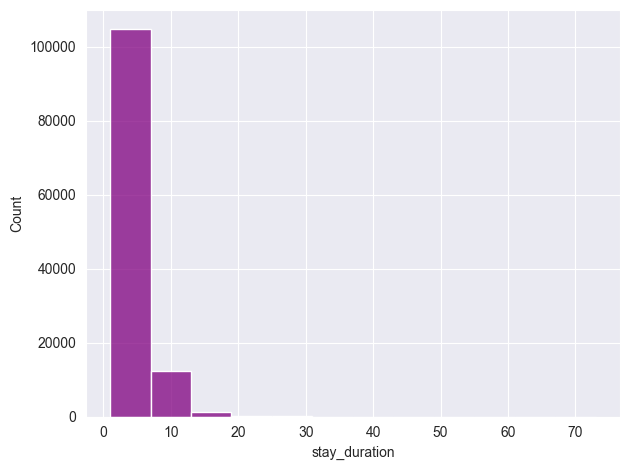

In [12]:
# Make a copy of cleaned data
df5 = df3.copy()
# Take a look at the distribution of stay duration
sns.histplot(data=df5, x='stay_duration', binwidth=6, color="purple")
plt.tight_layout()

Dari histogram plot diatas, bisa disimpulkan bahwa data pada kolom stay_duration memiliki persebaran yang condong ke kanan. Oleh karena itu, stay_duration dibagi menjadi 4 kelompok, yaitu: 1-7 hari, 8-14 hari, 14-21 hari, dan lebih dari 21 hari.

In [13]:
# Pembagian stay_duration menjadi 4 kelompok
# 1 = 1-7 hari, 8 = 8-14 hari, 15 = 15-21 hari, 21 = >21 hari
df5['stay_duration_group'] = np.where(df5.stay_duration < 8, 1, 
                            (np.where((df5.stay_duration > 7) & (df5.stay_duration < 15), 8,
                            (np.where((df5.stay_duration > 14) & (df5.stay_duration < 22), 15, 21)))))

# Menggunakan fungsi group by untuk melakukan agregasi data menghitung jumlah booking hotel berdasarkan tipe hotel
df5_agg = df5.groupby(['hotel', 'is_canceled', 'stay_duration_group'])['arrival_date_month'].count().reset_index(name='num_bookings')
df5_pvt = df5_agg.pivot_table(index=['hotel', 'stay_duration_group'], columns='is_canceled', values='num_bookings').reset_index()
df5_pvt['cancellation_rate'] = round(df5_pvt[1]*100.0/(df5_pvt[0]+df5_pvt[1]), 2)
df5_pvt

is_canceled,hotel,stay_duration_group,0,1,cancellation_rate
0,City Hotel,1,45287,32391,41.70
1,City Hotel,8,511,558,52.20
2,City Hotel,15,29,76,72.38
3,City Hotel,21,6,41,87.23
4,Resort Hotel,1,25754,9907,27.78
5,Resort Hotel,8,2650,1078,28.92
6,Resort Hotel,15,90,79,46.75
7,Resort Hotel,21,62,46,42.59


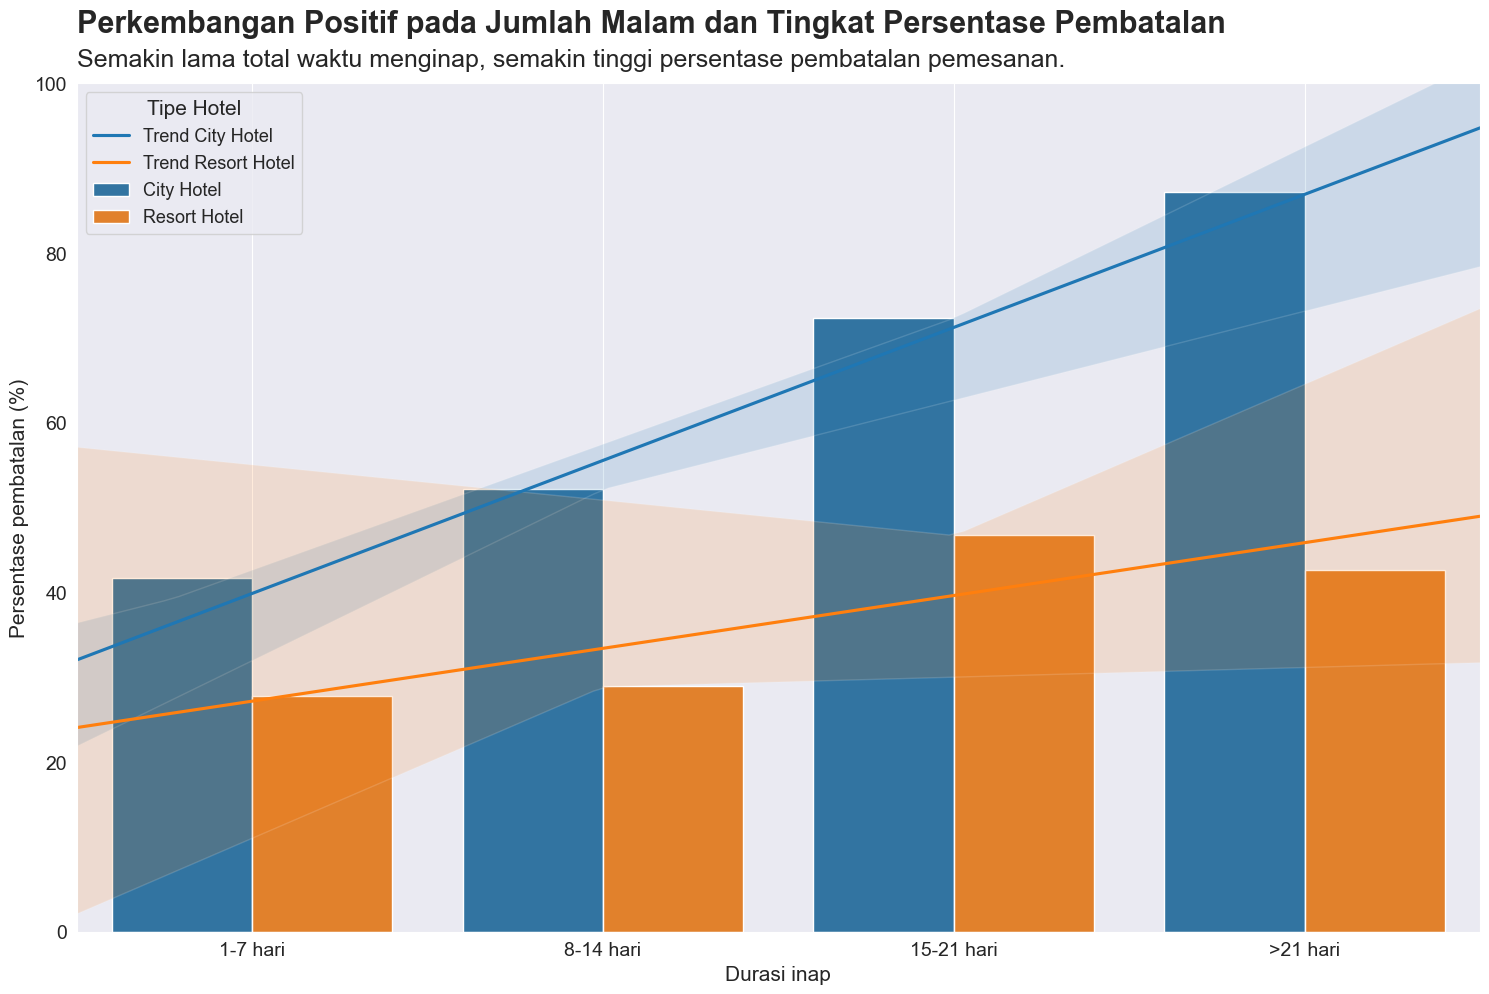

In [14]:
# Visualisasi data menggunakan barplot sebagai pembanding City Hotel dan Resort Hotel
# serta menggunakan regplot untuk melihat regresi data
plt.figure(figsize=(15,10))
ax = sns.barplot(x='stay_duration_group', y='cancellation_rate', hue='hotel', data=df5_pvt)
for c in ax.patches:
    c.set_zorder(0)
sns.regplot(x=np.arange(0, len(df5_pvt[df5_pvt['hotel'] == 'City Hotel'])), y='cancellation_rate', 
            data=df5_pvt[df5_pvt['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel', truncate=False)
sns.regplot(x=np.arange(0, len(df5_pvt[df5_pvt['hotel'] == 'City Hotel'])), y='cancellation_rate', 
            data=df5_pvt[df5_pvt['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.legend(title='Tipe Hotel', title_fontsize=15, prop={'size':13})
plt.xticks(range(0,4,1), labels=['1-7 hari', '8-14 hari', '15-21 hari', '>21 hari'])
plt.xlabel('Durasi inap', fontsize=15)
plt.ylabel('Persentase pembatalan (%)', fontsize=15)
plt.ylim(0, 100)
plt.xlim(-0.5, 3.5)
plt.text(x=-0.5, y=106, s='Perkembangan Positif pada Jumlah Malam dan Tingkat Persentase Pembatalan', fontsize=22, fontweight='bold')
plt.text(x=-0.5, y=102, s='Semakin lama total waktu menginap, semakin tinggi persentase pembatalan pemesanan.', fontsize=18)
plt.tight_layout()

## Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate ##

In [15]:
df6 = df3.copy() 
# Pembagian waktu tunggu menjadi 6 kelompok
# 1 = kurang dari 1 bulan, 31 = 2-4 bulan, 121 = 5-7 bulan, 211 = 8-10 bulan, 301 = 11-12 bulan, 361 = >12 bulan
def group(x):
    if x['lead_time'] <= 30:
        ctg = 1
    elif x['lead_time'] >= 31 and x['lead_time'] <= 120:
        ctg = 31
    elif x['lead_time'] >= 121 and x['lead_time'] <= 210:
        ctg = 121
    elif x['lead_time'] >= 211 and x['lead_time'] <= 300:
        ctg = 211
    elif x['lead_time'] >= 301 and x['lead_time'] <= 360:
        ctg = 301
    else:
        ctg = 361
    return ctg

df6['cat_lead_time'] = df6.apply(lambda x: group(x), axis=1)
df6.head()

# Menggunakan fungsi group by untuk melakukan agregasi data menghitung persentase pembatalan booking hotel tiap durasi waktu tunggu setelah pemesanan per bulan
df6_agg = df6.groupby(['hotel', 'is_canceled', 'cat_lead_time'])['hotel'].count().reset_index(name='num_bookings')
df6_pivot = df6_agg.pivot_table(index=['hotel', 'cat_lead_time'], columns='is_canceled', values='num_bookings').reset_index()
df6_pivot['cancellation_rate'] = round(df6_pivot[1]*100.0/(df6_pivot[0]+df6_pivot[1]), 2)
df6_pivot

is_canceled,hotel,cat_lead_time,0,1,cancellation_rate
0,City Hotel,1,17848,5174,22.47
1,City Hotel,31,16406,11783,41.80
2,City Hotel,121,7298,7051,49.14
3,City Hotel,211,2760,4376,61.32
4,City Hotel,301,731,2608,78.11
5,City Hotel,361,790,2074,72.42
6,Resort Hotel,1,13096,1976,13.11
7,Resort Hotel,31,7663,3999,34.29
8,Resort Hotel,121,4585,2685,36.93
9,Resort Hotel,211,2263,1723,43.23


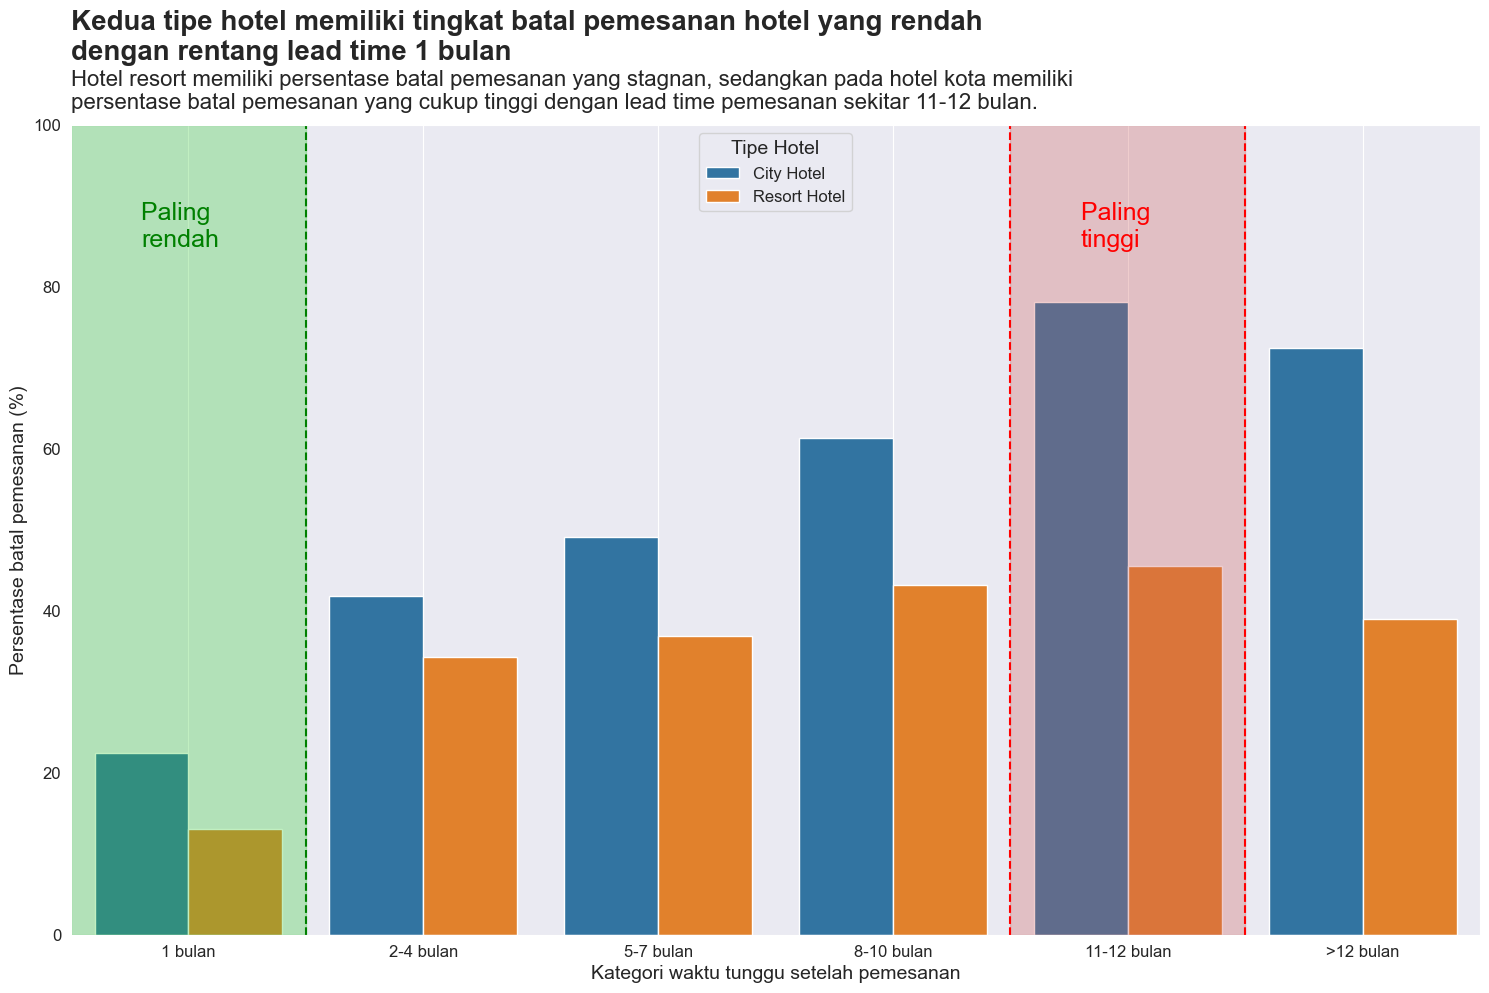

In [16]:
# Visualisasi data
plt.figure(figsize=(15,10))
sns.barplot(x='cat_lead_time', y='cancellation_rate', hue='hotel', data=df6_pivot)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid()
plt.legend(title='Tipe Hotel', title_fontsize=14, prop={'size':12}, loc=9)
plt.xticks(range(0,6,1), labels=['1 bulan', '2-4 bulan', '5-7 bulan', '8-10 bulan', '11-12 bulan', '>12 bulan'])
plt.xlabel('Kategori waktu tunggu setelah pemesanan', fontsize=14) 
plt.ylabel('Persentase batal pemesanan (%)', fontsize=14)
plt.ylim(0, 100)
plt.xlim(-0.5,5.5)
plt.axvline(0.5, ls='--', color='green')
plt.text(x=-0.2, y=85, s='Paling \nrendah', fontsize=18, color='green')
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='limegreen', alpha=0.3)
plt.axvline(3.5, ls='--', color='red')
plt.axvline(4.5, ls='--', color='red')
plt.text(x=3.8, y=85, s='Paling \ntinggi', fontsize=18, color='red')
plt.stackplot(np.arange(3.5,5.5,1), [[100]], color='indianred', alpha=0.3)
plt.text(x=-0.5, y=108, s='Kedua tipe hotel memiliki tingkat batal pemesanan hotel yang rendah \ndengan rentang lead time 1 bulan', fontsize=20, fontweight='bold')
plt.text(x=-0.5, y=102, s='Hotel resort memiliki persentase batal pemesanan yang stagnan, sedangkan pada hotel kota memiliki \npersentase batal pemesanan yang cukup tinggi dengan lead time pemesanan sekitar 11-12 bulan.', 
         fontsize=16)
plt.tight_layout()